# Exploratory Data Analysis - Terrorism

Performer -**Naman Sahu**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df=pd.read_csv('/content/drive/MyDrive/data/Global Terrorism - START data.zip',encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [20]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [21]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [22]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in :',df.loc[df['Killed'].idxmax()].Country)
print("City with the most attacks:",df['city'].value_counts().index[1])
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in : Iraq
City with the most attacks: Baghdad
Year with the most attacks: 2014
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion


In [23]:
terror_df =df[(df['Group'] != 'Unknown') & (df['casualities'] > 50)]
terror_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,4,United Kingdom,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2.0,130.0,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132.0
1314,1972,5,30,Israel,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26.0,72.0,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98.0
1789,1973,3,8,United Kingdom,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1.0,238.0,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239.0
1972,1973,8,5,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5.0,55.0,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60.0
2138,1973,12,17,Italy,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30.0,50.0,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80.0


# Data Visualisation

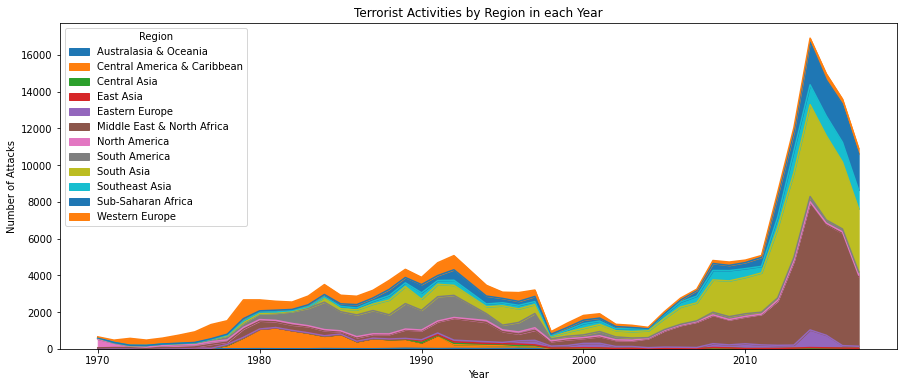

In [24]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

**Terror Activites Per Year**

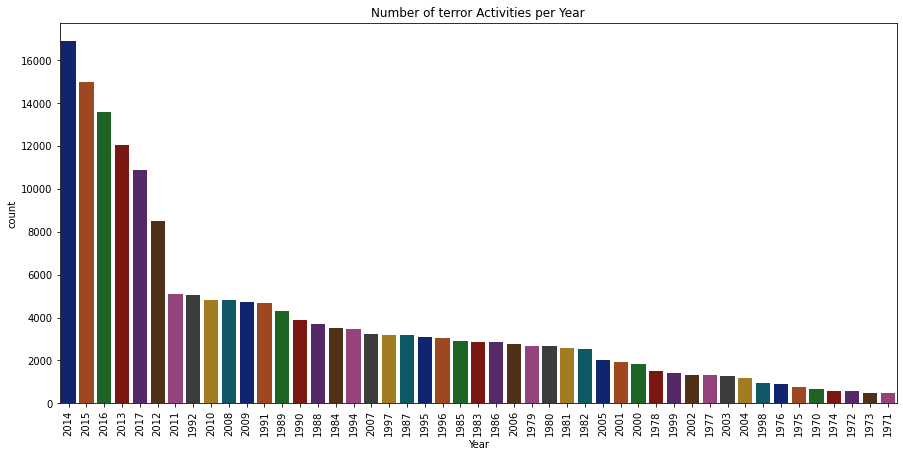

In [25]:
from seaborn import palettes
plt.figure(figsize=(15,7))
sns.countplot('Year',data=df,palette='dark',order=df['Year'].value_counts().index)
plt.title("Number of terror Activities per Year")
plt.xticks(rotation=90)
plt.show()

**Attack types Used**

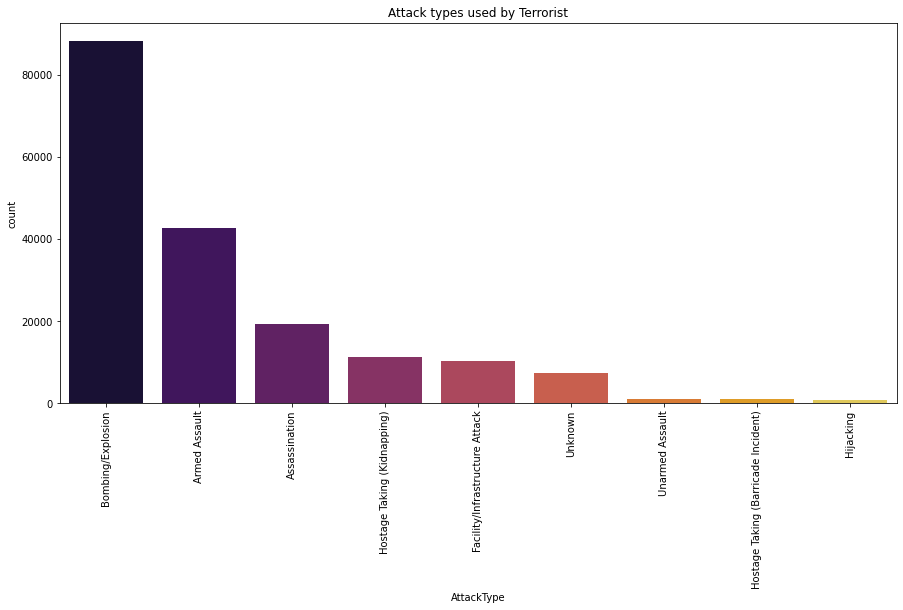

In [26]:
plt.figure(figsize=(15,7))
sns.countplot('AttackType',data=df,order=df['AttackType'].value_counts().index,palette='inferno')
plt.title("Attack types used by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Types of People Targeted**

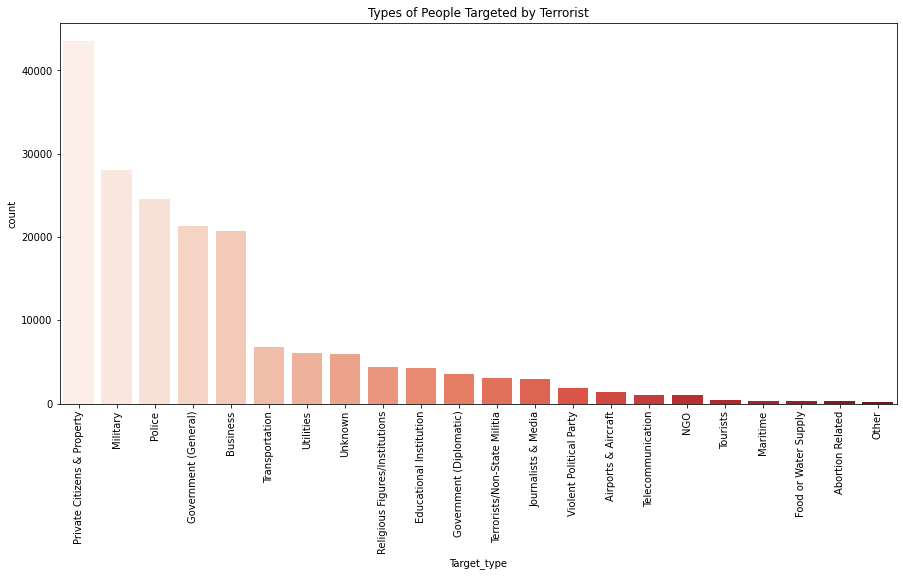

In [27]:
plt.figure(figsize=(15,7))
sns.countplot('Target_type',data=df,order=df['Target_type'].value_counts().index,palette='Reds')
plt.title("Types of People Targeted by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Most Affected Regions**

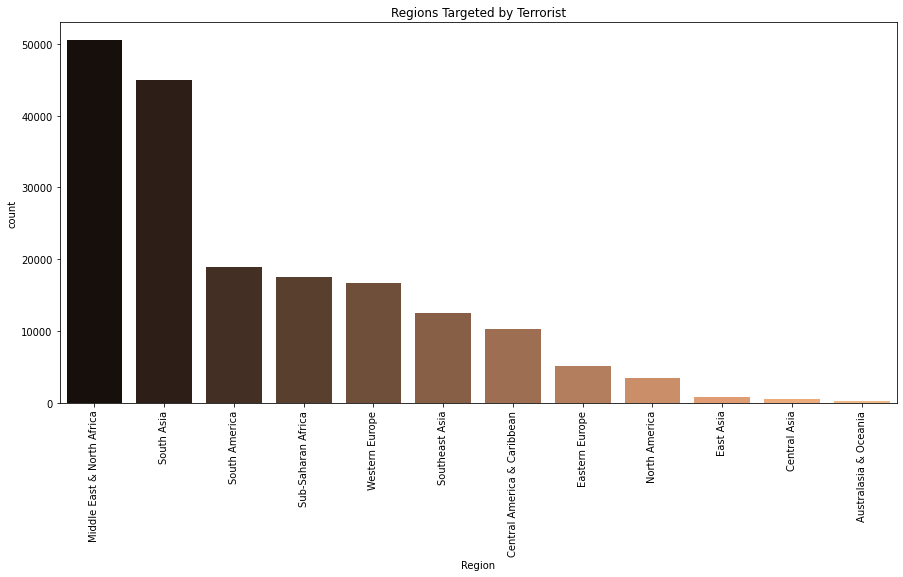

In [28]:
plt.figure(figsize=(15,7))
sns.countplot('Region',data=df,order=df['Region'].value_counts().index,palette='copper')
plt.title("Regions Targeted by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Top Countries Targeted**

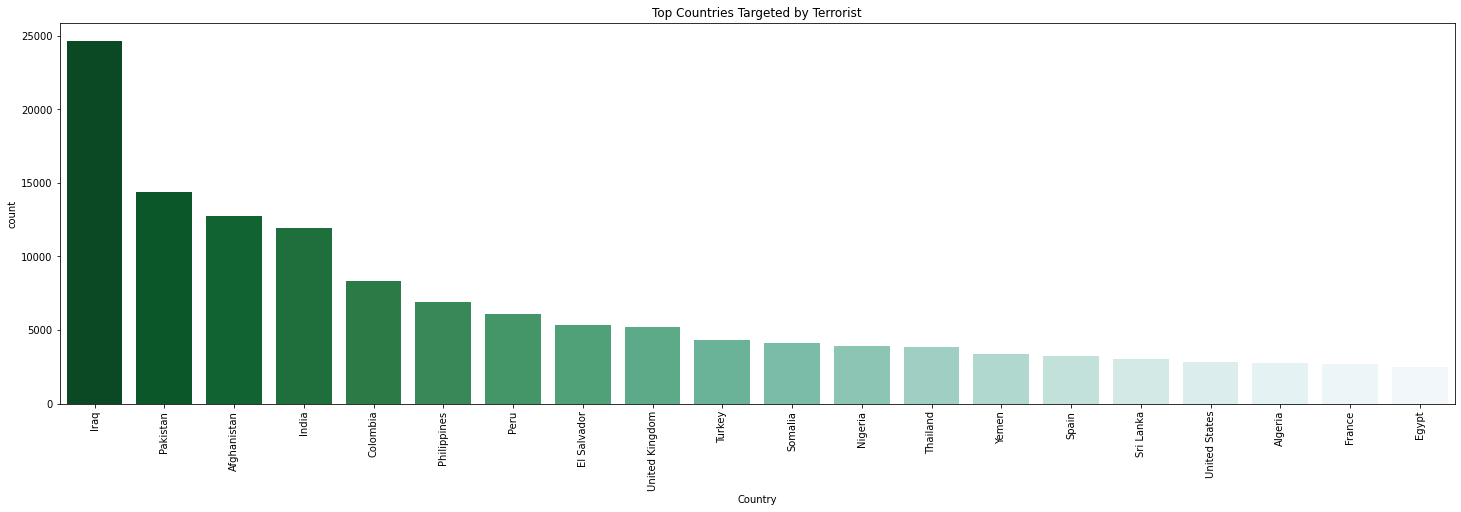

In [29]:
plt.figure(figsize=(25,7))
sns.countplot('Country',data=df,order=df['Country'].value_counts().index[:20],palette='BuGn_r')
plt.title("Top Countries Targeted by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Terrorist Groups with Highest Terror Attacks**

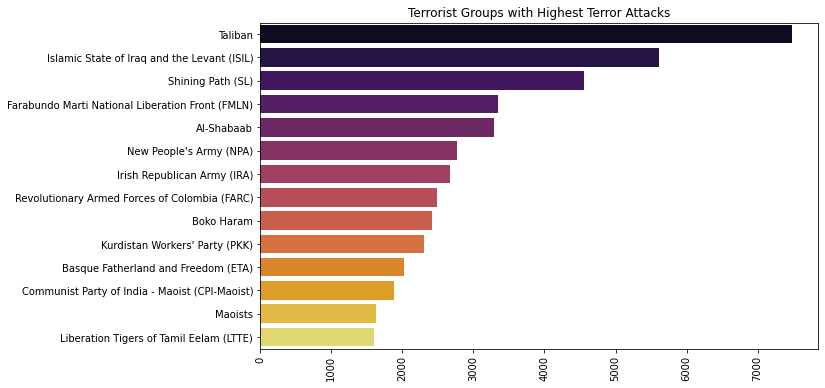

In [30]:
plt.figure(figsize=(25,7))
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title("Terrorist Groups with Highest Terror Attacks")
plt.xticks(rotation=90)
plt.show()

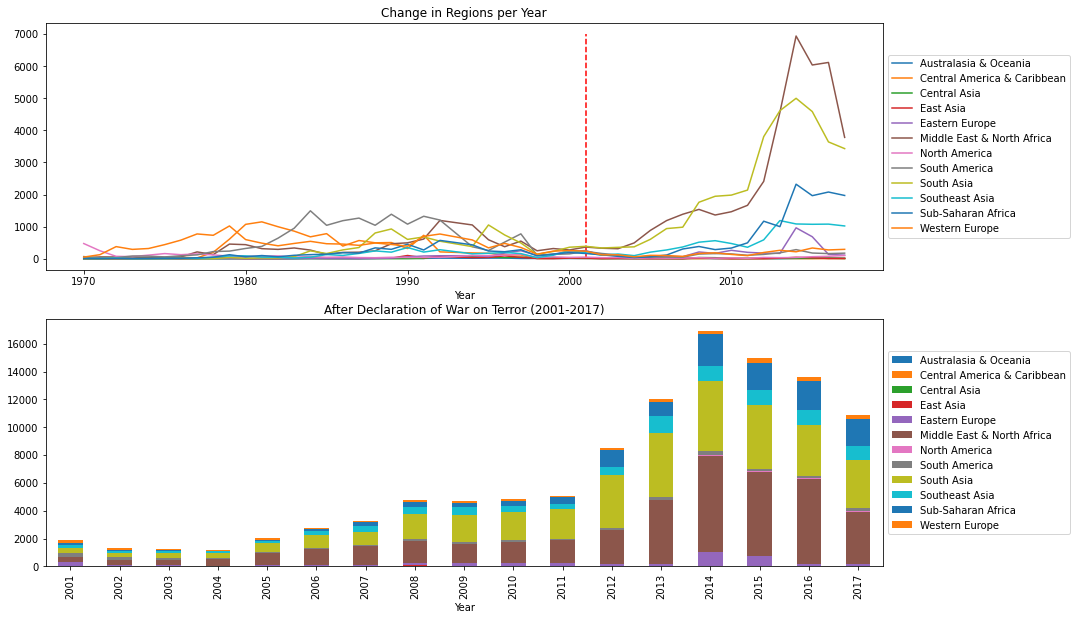

In [31]:
df_after = df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

# Conclusion
Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.

# End of Task 4